# Logistic Regression

Inspiration: 
- [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)
- [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

In [37]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
train = pd.read_csv('./data/titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

Every yellow dash in the heatmap shown above represents a missing value in the dataset. Thus, we can conclude that we're missing some age information, a lot of missing cabin information, and just one missing value for embarked column.

The proportion of missing age data is likely small enough for a reasonable replacement of some form of imputation, which means that we can use the knowledge of the other columns to fill in reasonable values for that age column.

On the other hand, looking at the cabin data, it looks like we are missing a lot of data to do something useful with that data at a basic level. We can drop this column, or change the feature to "cabin known" with 1 and 0 as the value.

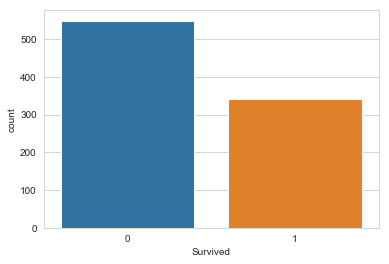

In [39]:
sns.countplot(x='Survived', data=train)

We can easily spot from the count plot that there were more decesead passengers than survivors.

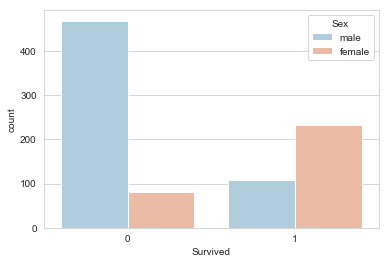

In [40]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

People that not survived were more likely to be male. 

People that survived were almost about twice likely to be female. 

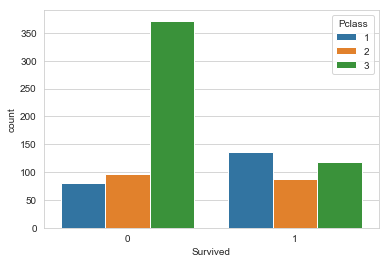

In [41]:
sns.countplot(x='Survived', hue='Pclass', data=train)

People who did not survive were overwhelmingly part of the third class or the lowest class (cheapest).

People that did survive were leaning a little bit more towards the higher class (most expensive).

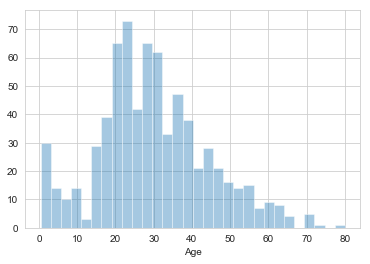

In [42]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

We have something that appears to be almost bimodal distribution where you have quite a few young passengers (age 0 to 10), but then after that you can see it starts to get an average age towards twenty or thirty something. 

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


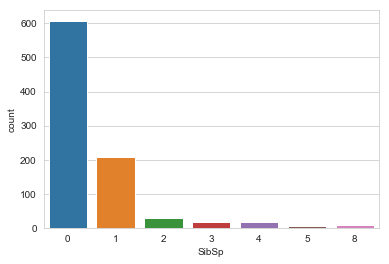

In [44]:
sns.countplot(x='SibSp', data=train)

Most of the people where traveling on their own. The second most popular option in the plot is one, which probably means there were man with their spouses (couples).

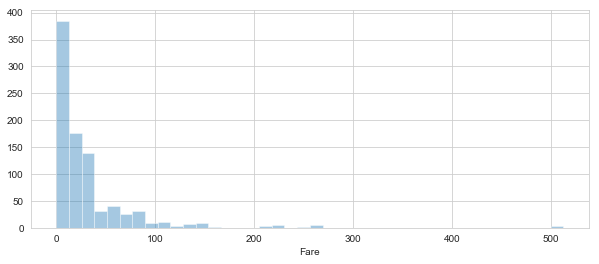

In [45]:
plt.subplots(figsize=(10,4))
sns.distplot(train['Fare'], bins=40, kde=False)

Most of the purchase prices where between 0 and 50. It makes sense that things are distributed towards the cheaper fare tickets because as we have already seen, most passengers where in the cheaper third class.

## Cleaning data

### Dealing with missing data

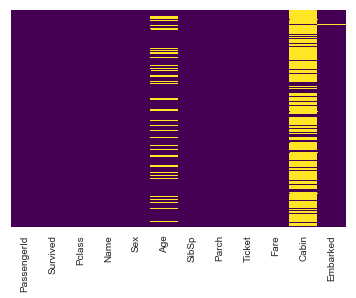

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')    # heatmap to check for missing values

Every yellow dash in the heatmap shown above represents a missing value in the dataset. Thus, we can conclude that we're missing some age information, a lot of missing cabin information, and just one missing value for embarked column.

The proportion of missing age data is likely small enough for a reasonable replacement of some form of imputation, which means that we can use the knowledge of the other columns to fill in reasonable values for that age column.

On the other hand, looking at the cabin data, it looks like we are missing a lot of data to do something useful with that data at a basic level. We can drop this column, or change the feature to "cabin known" with 1 and 0 as the value.

____

We want to fill in missing data for the age column instead of just dropping all the missing age data rows.

One way to do this is by imputation, which is filling in the mean age of all the passengers. And even a better aproach is to check the average age passenger class and fill in the missing data points base on the average of their own class.

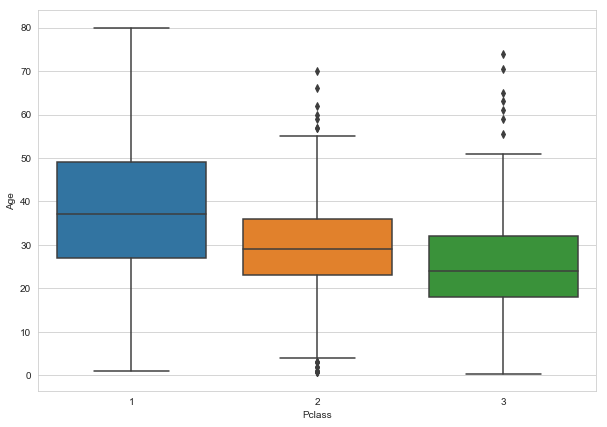

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

The wealthier passengers (the people on class 1 and 2) tend to be a little bit older than passengers on class 3. 

In [48]:
# average ages by class
print('Average age - class 1: {}'.format(int(train[train['Pclass'] == 1].mean().Age)))
print('Average age - class 2: {}'.format(int(train[train['Pclass'] == 2].mean().Age)))
print('Average age - class 3: {}'.format(int(train[train['Pclass'] == 3].mean().Age)))

Average age - class 1: 38
Average age - class 2: 29
Average age - class 3: 25


In [49]:
def impute_age(cols): 
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [50]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

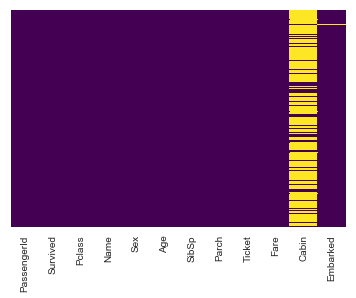

In [51]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')    # heatmap to check for missing values

We can see that there are not missing values in the age columns thanks to our imputation method. 

On the other hand, there are too many missing values in the cabin column. We are going to drop this column.

In [52]:
train.drop('Cabin', axis=1, inplace=True)

In [53]:
train.head()    # we can see that cabin is not longer in the df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


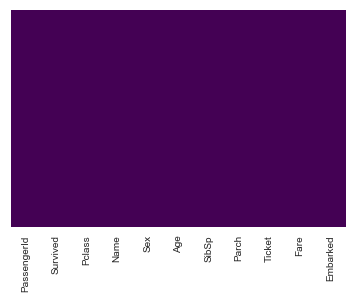

In [54]:
train.dropna(inplace=True)

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')    # heatmap to check for missing values

No more missing values

### Dealing with categorical variables

Create dummy variable format for categorical variables

In [55]:
sex = pd.get_dummies(train['Sex'], drop_first=True)    # drop first value to avoid multicollinearity

In [56]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [57]:
train = pd.concat([train,sex,embark],axis=1)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [59]:
# drop columns we're not going to use
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [60]:
train.head()    # all data is numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [61]:
train.drop('PassengerId', axis=1, inplace=True)

In [62]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,25.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


Parch is also a categorical data, we leave it as it is to explore the behaviour of the model with this data as column, instead of using pd.get_dummies method.

## ML model

We are going to use the train csv as if it was the whole dataset in order to practice the train test data split method from sklearn.

In [63]:
X = train.drop('Survived', axis=1)
y = train['Survived']

# split data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  

In [64]:
logmodel = LogisticRegression()    # create the model

In [65]:
logmodel.fit(X_train, y_train)    # fit the model

C:\Users\reva_\AppData\Local\conda\conda\envs\data_science2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
predictions = logmodel.predict(X_test)    # predict with the model

In [67]:
print(classification_report(y_test, predictions))    # classification report

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [68]:
print(confusion_matrix(y_test, predictions))    # confusion matrix

[[148  15]
 [ 36  68]]


The result of this confusion matrix is telling us that we have 148(TN) + 68(TP) correct predictions and 36(FN) + 15(FP) incorrect predictions.

In [69]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))    # accuracy of the model

Accuracy of logistic regression classifier on test set: 0.81


- Our predictions are not so bad considering that we are only taking half of the dataset. 
- The way we can improve this classifier is by using the whole dataset or by using different models such as a random forest.